In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import numpy as np

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [12]:
ds       = np.load("LDPC_BERvsSNR0.npz")
codeRate = ds["codeRate"]
SNRdB    = ds["SNRdB"]
BER      = ds['BER']

for i in range(1,84):
    print(i)
    ds = np.load("LDPC_BERvsSNR"+str(i)+".npz")
    BER = BER + ds['BER']
    
BER = BER/84

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83


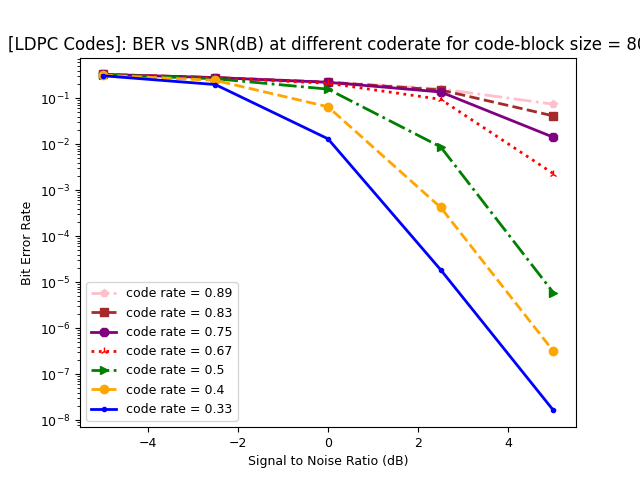

In [14]:
fig, ax = plt.subplots()

color_tuple     = ['blue', 'orange', 'green',   'red',    'purple', 'brown',       'pink',  'gray', 'olive', 'cyan', 'black']
markcolor_tuple = ['gold', 'navy',   'crimson', 'yellow', 'line',   'springgreen', 'black', 'aqua', 'royalblue', 'red', 'green']
linestyle_tuple = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted']
marker_tuple    = [".", "o", ">", "2", "8", "s", "p", "*", "P", "X", "D"]

rIndex = codeRate.size-1
for coderate in np.flip(codeRate):
    ax.semilogy(SNRdB, BER[rIndex], color=color_tuple[rIndex%len(color_tuple)], 
                linestyle=linestyle_tuple[rIndex%len(linestyle_tuple)], lw = 2,
                marker=marker_tuple[rIndex%len(marker_tuple)], markersize = 6, label="code rate = "+str(coderate))
    
    rIndex = rIndex - 1

ax.legend(loc="lower left")
ax.set_xlabel("Signal to Noise Ratio (dB)", fontsize = 9)
ax.set_ylabel("Bit Error Rate", fontsize = 9)
ax.set_title("[LDPC Codes]: BER vs SNR(dB) at different coderate for code-block size = 80", fontsize = 12)
plt.rcParams.update({'font.size': 9})
plt.show()

In [15]:
plt.savefig("SNRvsBER_LDPC.png")